<a href="https://colab.research.google.com/github/h1m4/ai_deep_learning_study/blob/master/ai_training/machine_learning_for_beginners_practice_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구매 이력 데이터를 통한 사용자 그룹 만들기

* 먼저 로컬 환경이 아닌 colab 환경에서 제작하므로 로컬의 엑셀 파일을 colab에 올린다.

In [1]:
from google.colab import files
uploaded = files.upload()


for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
   name = fn, length = len(uploaded[fn])))

Saving online_retail_utf.txt to online_retail_utf.txt
User uploaded file "online_retail_utf.txt" with length 44496850 bytes


In [2]:
import time
from scipy import stats


# 데이터 구조 정의
# 사용자 ID를 키로, 상품 코드의 셋을 밸류로 갖는 딕셔너리와
# 상품 코드를 키로, 사용자 ID의 셋을 밸류로 갖는 딕셔너리
user_product_dic = {}
product_user_dic = {}

# 상품 코드를 키로 가지고 상품명을 밸류로 갖는 딕셔너리
# 군집화의 내용을 확인하는 단계에서 상품명을 사용합니다.
product_id_name_dic = {}

# 파일을 읽어 위에 정의한 데이터구조를 채웁니다.
for line in open('online_retail_utf.txt'):

    # 데이터를 한 행씩 읽어서 필요한 항목을 저장합니다.
    line_items = line.strip().split('\t')
    user_code = line_items[6]
    product_id = line_items[1]
    product_name = line_items[2]

    # 사용자 ID가 없을 경우 무시합니다.
    if len(user_code) == 0:
        continue

    # 영국에서 구매한 사용자만 고려하므로, 국가가 united kingdom이 아닌 경우엔 무시합니다.
    country = line_items[7]
    if country != 'United Kingdom':
        continue

    # 연도 읽을 때 에러 처리. 파일 헤더를 무시합니다.
    try:
        invoice_year = time.strptime(line_items[4], '%m/%d/%y %H:%M').tm_year

    except ValueError:
        continue

    # 2011년에 일어난 구매가 아닌 것은 무시합니다.
    if invoice_year != 2011:
        continue

    # 읽은 정보로 데이터 구조를 채웁니다.
    # 상품 가짓수를 고려하므로 상품 코드를 셋으로 가지도록 하겠습니다.
    user_product_dic.setdefault(user_code, set())
    user_product_dic[user_code].add(product_id)

    product_user_dic.setdefault(product_id, set())
    product_user_dic[product_id].add(user_code)

    product_id_name_dic[product_id] = product_name

# 데이터구조를 다 채웠으므로 각 사용자들이 구매한 상품 가짓수로 리스트를 만들어봅시다.
product_per_user_li = [len(x) for x in user_product_dic.values()]


# 이 장에서 사용할 최종 사용자 수와 상품 가짓수를 출력해봅니다.
print('# of users:', len(user_product_dic))
print('# of products:', len(product_user_dic))

# 각 사용자들이 구매한 상품 가짓수로 기초 통계량을 출력합니다.
print(stats.describe(product_per_user_li))

# of users: 3835
# of products: 3588
DescribeResult(nobs=3835, minmax=(1, 1603), mean=58.69074315514993, variance=6207.1088214350575, skewness=5.833816723404396, kurtosis=72.60364097540136)


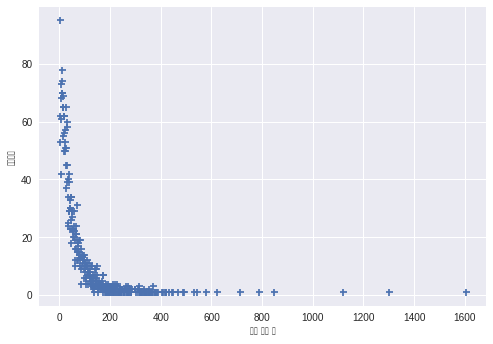

In [5]:
from collections import Counter
import matplotlib.pyplot as plt

plot_data_all = Counter(product_per_user_li)
plot_data_x = list(plot_data_all.keys())
plot_data_y = list(plot_data_all.values())
plt.xlabel('상품 가짓 수')
plt.ylabel('사용자수')
plt.scatter(plot_data_x, plot_data_y, marker = '+')

plt.show()